* **Author** Tuyen Nguyen
* **Date** 16th Sep 2020
----
0. [Introduction](#section0)
    * First Approach To The Dataset
    * Data Analysis Worflow
1. [Dataset `showwcase_sessions.csv` analysis](#section1)
2. [Hypothesis Testing and Linear Regression Prediction](#section2)
2. [Analysis Summary](#section3)

# Introduction<a class="anchor" id="section0"></a>
📌 The `goal` is to provide a better understand "user engagement" on the SHOWWCASE platform in the last month
(October 2019 in this assessment)


### First Approach To The Dataset🤔
Firstly, in order to make it easier to follow the workflow of the analysis, this section will walk you through some of the basically important characteristics of the dataset `showwcase_sessions` given. 
- *Each instance represent a record of each session a user completes*
- *Dimensions of dataset:* 
    <br>● session_id → unique identification number for each session
    <br>● customer_id → unique identification number for each customer
    <br>● login_date → the date the user logged into Showwcase for that session
    <br>● projects_added → boolean if at least one project was added
    <br>● likes_given → boolean if at least one like was given
    <br>● comment_given → boolean if at least one comment was given
    <br>● inactive_status → boolean if the user was inactive or idle
    <br>● bugs_occurerd → boolean if a user ran into at least one bug
    <br>● session_projects_added → number of projects added
    <br>● session_likes_given → number of likes given
    <br>● session_comments_given → number of comments given
    <br>● inactive_duration → number of seconds a user was inactive or idle
    <br>● bugs_in_session → number of bugs a user ran into
    <br>● session_duration → number of seconds a user was logged for that session*
- *NA values in each dataset*: the dataset has only 1 instance with null value in `session_likes_given`, which will be illustrated later on.
- *Basic analysis of the submission:* The dataset can be split up 2 types of columns regarding their dependency:
    <br>● Customer dependency: customer_id, login_date, projects_added,likes_given, comment_given, inactive_status, bug_occured, inactive_duration 	<br>● Session dependency: session_id, session_projects_added, session_likes_given, session_comments_given, inactive_duration, bugs_in_session, session_duration 

- *Target columns:* there are 2 columns could be considered as our target column/ labeled column, which are `inactive_status` and `inactive_duration`

- `Features` are `categorical`:`projects_added`, `likes_given`, `comment_given`, `inactive_status`, `bug_occured`. They are all nominal data with 2 values **True** and **False**. 
- `Features` are `numerical`: `login_date`, `session_projects_added`, `session_likes_given`, `session_comments_given`, `inactive_duration`, `bugs_in_session`, `session_duration`. They are all discrete numbers with different ranges.
- `Data types` for the `features`:
    <br>First group: `categorical` is `boolean` 
    <br>Second group: `numerical` is `numeric`; except for `login_date` is `date`

- `showwcase_sessions` is the main data files which **contains the information on users' account and sessions completed by them*** 
<br> `showwcase_sessions.csv` (rows, columns) == (300,14)

### Data Analysis workflow

**1.- Study the data 🔬**
 <br>[A. DATA QUALITY DIMENSION](#section1a)
 <br>[B. GENERAL REPORT ON DATASET](#section1b)
 <br>[C. VALUEABLE INSIGHTS](#section1c)


**2.- Assumptions and testing 📝**
 <br>[A- CATEGORICAL TARGET](#section2a)
 <br>[B- NUMERICAL TARGET](#section2b)

**3.- Conclusions 💡**
 <br>[A- CATEGORICAL TARGET](#section3a)
 <br>[B- NUMERICAL TARGET](#section3b)


# 1.- Study the `showwcase_sessions.csv` data<a class="anchor" id="section1"></a>

In [1]:
# Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data
path_data = './data/'
columns = ['session_id', 'customer_id', 'login_date', 'projects_added', 'likes_given', 'comment_given','inactive_status', 'bug_occured', 'session_projects_added', 'session_likes_given', 'session_comments_given','inactive_duration','bugs_in_session','session_duration']

df = pd.read_csv(path_data + 'showwcase_sessions.csv', usecols=columns) # no event_data


In [3]:
df.head(5)

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205,80746,10/30/2019,False,True,True,True,False,0,24.0,3,1146,0,1564
1,624241,24520,10/30/2019,True,True,True,True,False,2,3.0,5,133,0,1766
2,111002,32047,10/30/2019,True,True,True,True,False,1,5.0,5,1571,0,2230
3,545113,23404,10/30/2019,True,True,True,False,False,1,10.0,21,0,0,633
4,750269,40235,10/30/2019,True,True,False,True,False,3,16.0,0,1405,0,1679


Since the sample dataset may have data integrity issues, we need to check out some possible data problems which could occur

**A. DATA QUALITY DIMENSION**<a class="anchor" id="section1a"></a>

***Completeness***

In [4]:
df.isnull().sum()

session_id                0
customer_id               0
login_date                0
projects_added            0
likes_given               0
comment_given             0
inactive_status           0
bug_occured               0
session_projects_added    0
session_likes_given       1
session_comments_given    0
inactive_duration         0
bugs_in_session           0
session_duration          0
dtype: int64

Acccording to this report, you can say the proportion of NA value is very small. Thus, it won't affect our analysis when we drop this 1 instance completely out of the dataset. 

In [5]:
#Drop instance has NA value in `session_likes_given`
df = df.dropna(axis=0, how= 'any')

In [6]:
#Recheck NA values
df.isnull().sum()

session_id                0
customer_id               0
login_date                0
projects_added            0
likes_given               0
comment_given             0
inactive_status           0
bug_occured               0
session_projects_added    0
session_likes_given       0
session_comments_given    0
inactive_duration         0
bugs_in_session           0
session_duration          0
dtype: int64

The NA problem has already been solved.

In [358]:
df.reset_index(inplace=True)

***Uniqueness***

In [8]:
df.drop_duplicates(keep='first')

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205,80746,10/30/2019,False,True,True,True,False,0,24.0,3,1146,0,1564
1,624241,24520,10/30/2019,True,True,True,True,False,2,3.0,5,133,0,1766
2,111002,32047,10/30/2019,True,True,True,True,False,1,5.0,5,1571,0,2230
3,545113,23404,10/30/2019,True,True,True,False,False,1,10.0,21,0,0,633
4,750269,40235,10/30/2019,True,True,False,True,False,3,16.0,0,1405,0,1679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,944212,40572,10/1/2019,True,True,False,True,False,3,13.0,0,1174,0,2255
296,558332,87323,10/1/2019,True,False,False,True,False,2,0.0,0,97,0,1692
297,643880,51243,10/1/2019,True,False,False,True,False,2,0.0,0,906,0,1990
298,844518,23083,10/1/2019,True,False,False,True,False,1,0.0,0,139,0,1113


The shape of dataset did not change so it satisfies `uniqueness` dimension. 

***Accuracy***

Check if all values belong to `October 2019`

In [12]:
df['login_date'] = pd.to_datetime(df['login_date'])

In [13]:
((df['login_date'].dt.month == 10) & (df['login_date'].dt.year == 2019)).all()

True

The value `True` returned means the dataset satisfies `accuracy` dimension on `October 2019`

However there are not any records on the `last day of Octorber 2019: 31st`

**B. GENERAL REPORT ON DATASET**<a class="anchor" id="section1b"></a>

***Report on number of values for each features***

As `session_id` and `customer_id` are 2 identification feature, which do not contribute to "customer engagement" analysis, so we could simply them for the rest of analysis.    

In [14]:
#The rest of attributes can be called by
df.columns[2:]

Index(['login_date', 'projects_added', 'likes_given', 'comment_given',
       'inactive_status', 'bug_occured', 'session_projects_added',
       'session_likes_given', 'session_comments_given', 'inactive_duration',
       'bugs_in_session', 'session_duration'],
      dtype='object')

In [26]:
for i in df.columns[2:]:
    print(df[i].value_counts())
    print("""
--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------""")

2019-10-26    21
2019-10-21    15
2019-10-10    14
2019-10-11    14
2019-10-15    14
2019-10-05    14
2019-10-07    13
2019-10-24    12
2019-10-06    12
2019-10-20    12
2019-10-19    11
2019-10-13    11
2019-10-18    11
2019-10-22    11
2019-10-03    10
2019-10-09    10
2019-10-28    10
2019-10-30     9
2019-10-04     9
2019-10-01     9
2019-10-12     8
2019-10-08     8
2019-10-27     7
2019-10-29     7
2019-10-25     6
2019-10-17     5
2019-10-02     5
2019-10-23     4
2019-10-16     4
2019-10-14     3
Name: login_date, dtype: int64

--------------------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------------------
True     226
False     73
Name: projects_added, dtype: int64

--------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------

***Statistical report of dataset***

In [27]:
df.describe().iloc[:,2:].round(decimals=2)

,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
count,299.00,299.00,299.00,299.00,299.00,299.00
mean,1.62,10.46,2.41,731.64,1.24,1190.41
std,1.34,9.47,2.25,839.25,1.76,686.87
min,0.00,0.00,0.00,0.00,0.00,10.00
25%,1.00,0.00,0.50,0.00,0.00,614.00
50%,2.00,9.00,2.00,312.00,0.00,1152.00
75%,3.00,19.00,4.00,1525.50,2.50,1778.00
max,9.00,27.00,21.00,2480.00,5.00,2395.00


***Correlation matrix of dataset***

To handle `categorical features`, we can encode `True` by `1` and `False` by `0`

In [28]:
df_encode = df.replace(True,1)

In [29]:
df_encode = df_encode.replace(False,0)

In [30]:
df_encode.head(5)

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205,80746,2019-10-30,0.0,1.0,1.0,1.0,0.0,0,24.0,3,1146,0,1564
1,624241,24520,2019-10-30,1.0,1.0,1.0,1.0,0.0,2,3.0,5,133,0,1766
2,111002,32047,2019-10-30,1.0,1.0,1.0,1.0,0.0,1,5.0,5,1571,0,2230
3,545113,23404,2019-10-30,1.0,1.0,1.0,0.0,0.0,1,10.0,21,0,0,633
4,750269,40235,2019-10-30,1.0,1.0,0.0,1.0,0.0,3,16.0,0,1405,0,1679


Since we do not need to study correlation of 2 first features: `session_id` and `customer_id`, we can simply eliminate them from the matrix

In [31]:
corr_matrix = df_encode.corr().iloc[2:,2:]
corr_matrix

,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
projects_added,1.000000,0.000058,-0.041506,-0.003947,0.005130,0.689355,-0.003747,-0.052704,-0.039180,-0.007384,0.042318
likes_given,0.000058,1.000000,0.075473,-0.071915,0.035853,-0.054197,0.702541,0.095637,-0.033793,0.005980,-0.035065
comment_given,-0.041506,0.075473,1.000000,-0.048446,0.017369,-0.049690,0.085124,0.619988,-0.040904,0.029915,0.021232
inactive_status,-0.003947,-0.071915,-0.048446,1.000000,0.120109,0.031388,-0.084572,0.006699,0.755511,0.128532,0.072894
bug_occured,0.005130,0.035853,0.017369,0.120109,1.000000,0.021741,0.060116,-0.031551,0.120919,0.885043,-0.029758
session_projects_added,0.689355,-0.054197,-0.049690,0.031388,0.021741,1.000000,-0.014775,-0.065215,0.001022,-0.038429,0.018398
session_likes_given,-0.003747,0.702541,0.085124,-0.084572,0.060116,-0.014775,1.000000,0.048944,-0.076404,0.032711,-0.057032
session_comments_given,-0.052704,0.095637,0.619988,0.006699,-0.031551,-0.065215,0.048944,1.000000,0.011550,-0.020312,0.010574
inactive_duration,-0.039180,-0.033793,-0.040904,0.755511,0.120919,0.001022,-0.076404,0.011550,1.000000,0.137024,0.073598
bugs_in_session,-0.007384,0.005980,0.029915,0.128532,0.885043,-0.038429,0.032711,-0.020312,0.137024,1.000000,-0.032970


In order to get a more visual of the matrix, we can use a `seaborn plot` to visualize the matrix

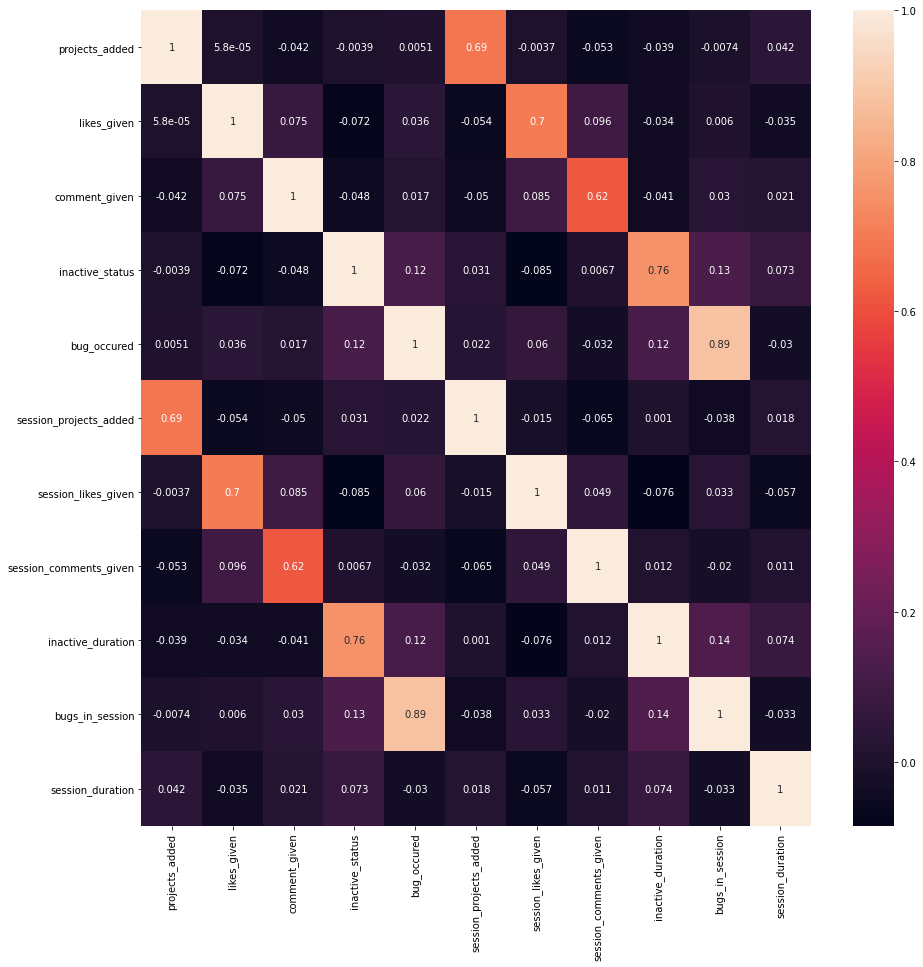

In [32]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,15))   
sns.heatmap(corr_matrix, annot = True, ax=ax)

***Report on `numeric features`***

In [33]:
df_hist=df_encode.iloc[:,8:]

In [34]:
df_hist.head(5)

,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,0,24.0,3,1146,0,1564
1,2,3.0,5,133,0,1766
2,1,5.0,5,1571,0,2230
3,1,10.0,21,0,0,633
4,3,16.0,0,1405,0,1679


<> **Histogram of each attribute:**

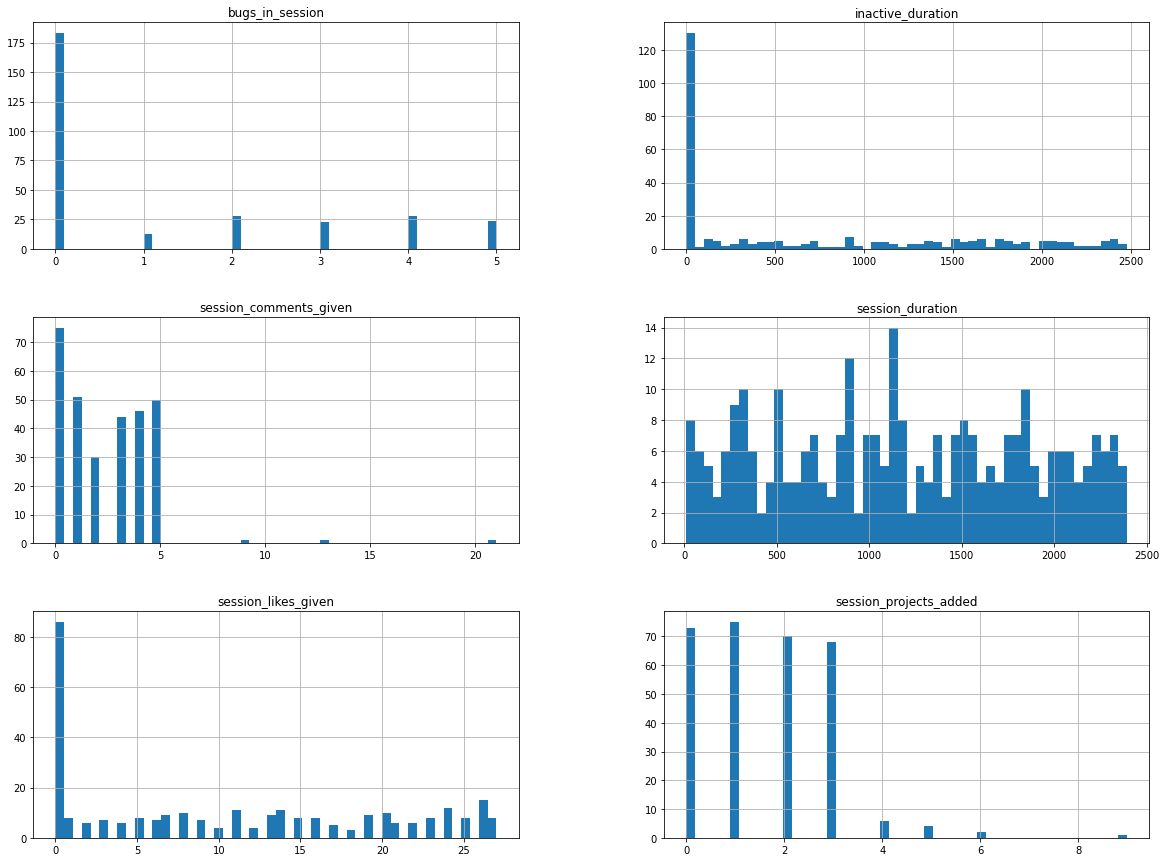

In [35]:
import matplotlib.pyplot as plt
df_hist.hist(bins=50, figsize=(20, 15))
plt.show()

<> **Distribution graph of each attribute:**

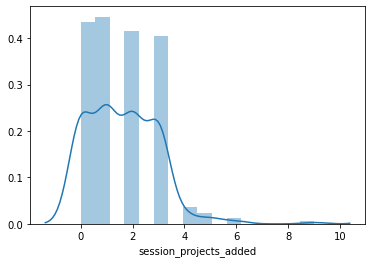

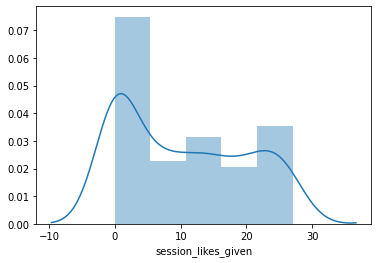

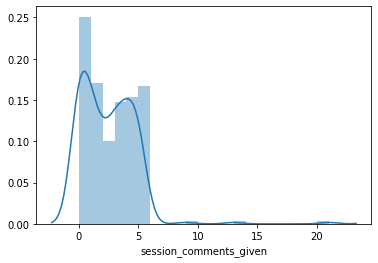

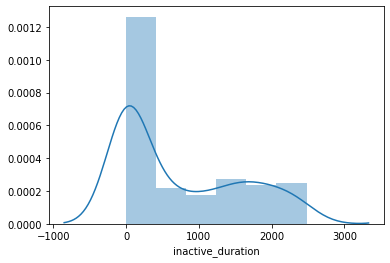

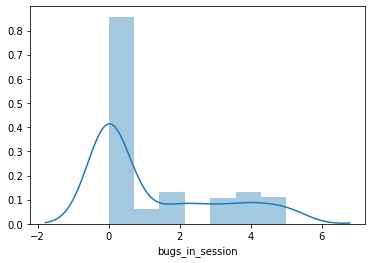

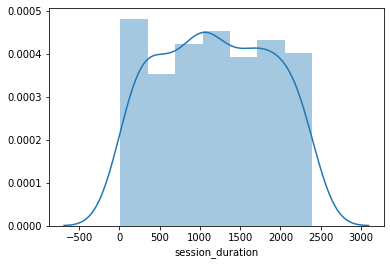

In [36]:
for i in df_hist.columns:
    sns.distplot(df_encode[i])
    plt.show()

**C. VALUABLE INSIGHTS OF DATASET**<a class="anchor" id="section1c"></a>

***Number of user logins plotted by each date in `October 2020`***

In [37]:
df['login_day']=df['login_date'].dt.day
no_of_user_date = dict(df['login_day'].value_counts())
no_of_user_date_begintoend= {x:y for x,y in sorted(no_of_user_date.items(), key=lambda t:t[0])}

In [38]:
objects = no_of_user_date_begintoend.keys()
y_pos = np.arange(len(objects))
performance = no_of_user_date_begintoend.values()

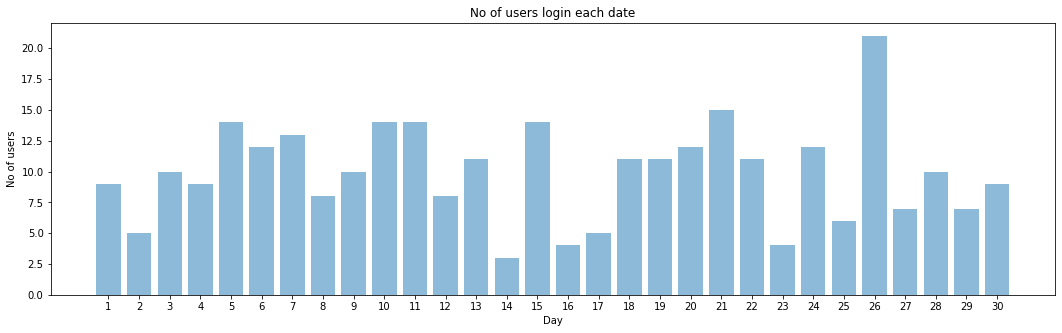

In [39]:
f, ax1 = plt.subplots(figsize=(18,5))
plt.bar(y_pos,performance, align = 'center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('No of users')
plt.xlabel('Day')
plt.title('No of users login each date')
plt.show()

As we can see from the visualization, the number of users login per day in `October 2020` drop to the **lowest on 14th** then **peak on 26th**. While the variation in the `first half of month` is `steady`, which fluctuates `without a proper increasing or decreasing trend`, the `rest of the month` has an `upward` trend `until 21st` `then` observes a `significant up-down phenomenon`. 

***Number of user logins plotted by week in `October 2020`***

We assume that the first week starts on 1st and only 29th along with 30th belong to the last week of `October 2020` 

In [72]:
#Divide number of users logging in by week
l= list(no_of_user_date_begintoend.items())
x = [l[i:i + 7] for i in range(0, len(l), 7)]
x

[[(1, 9), (2, 5), (3, 10), (4, 9), (5, 14), (6, 12), (7, 13)],
 [(8, 8), (9, 10), (10, 14), (11, 14), (12, 8), (13, 11), (14, 3)],
 [(15, 14), (16, 4), (17, 5), (18, 11), (19, 11), (20, 12), (21, 15)],
 [(22, 11), (23, 4), (24, 12), (25, 6), (26, 21), (27, 7), (28, 10)],
 [(29, 7), (30, 9)]]

In [95]:
#Count the sum of number of users logging in per week
users_by_week = {}
for k in range(len(x)):
    users_by_week[k+1]=(sum(x[k][i][1] for i in range(len(x[k]))))
users_by_week

{1: 72, 2: 68, 3: 72, 4: 71, 5: 16}

In [112]:
week_login = pd.DataFrame(list(users_by_week.items()), columns = ['Week','No of login users'])
import plotly.express as px
fig = px.bar(week_login, x="Week", y='No of login users', color="No of login users", height=400)
fig.show()

We can see from the graph, the distribution of users logging in is likely equal

***Some engagement KPIs***

* `DAU`: The number of active users (uniques) who use the app on a daily basis.
* `WAU`: The number of active users (uniques) of the app on a weekly basis.
* `Weekly Stickiness`: DAU/WAU.

### <font color = 'navy'>--------------------------------------------------------------------------  DAU  ----------------------------------------------------------------------------- </font>

In [98]:
df_active = df[df['inactive_status']==False]

In [99]:
df_active.head(5)

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,login_day
3,545113,23404,2019-10-30,True,True,True,False,False,1,10.0,21,0,0,633,30
6,922001,12407,2019-10-30,True,False,True,False,False,5,0.0,5,0,0,1329,30
8,490096,40572,2019-10-30,True,True,False,False,False,1,25.0,0,0,0,290,30
13,361637,51243,2019-10-29,True,True,False,False,False,3,24.0,0,0,0,39,29
15,920267,38459,2019-10-29,False,True,True,False,False,0,15.0,3,0,0,1188,29


Use the same logic of algorithm we can create a dataframe of active users by week

In [130]:
objects1 = active_per_day_begintoend.keys()
y_pos1 = np.arange(len(objects1))
performance1 = active_per_day_begintoend.values()

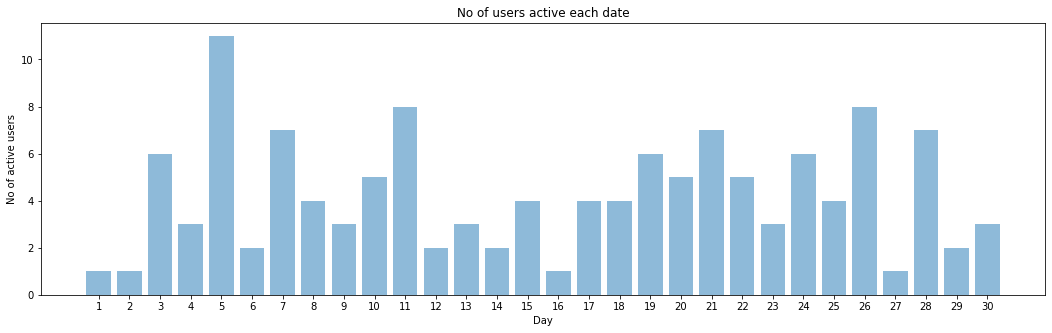

In [131]:
f1, ax2 = plt.subplots(figsize=(18,5))
plt.bar(y_pos1,performance1, align = 'center', alpha=0.5)
plt.xticks(y_pos1, objects1)
plt.ylabel('No of active users')
plt.xlabel('Day')
plt.title('No of users active each date')
plt.show()

### <font color = 'navy'>--------------------------------------------------------------------------  WAU  ----------------------------------------------------------------------------- </font>

In [100]:
active_per_day = dict(df_active['login_day'].value_counts())
active_per_day_begintoend= {x:y for x,y in sorted(active_per_day.items(), key=lambda t:t[0])}

In [101]:
l1= list(active_per_day_begintoend.items())
x1= [l1[i:i + 7] for i in range(0, len(l1), 7)]
x1

[[(1, 1), (2, 1), (3, 6), (4, 3), (5, 11), (6, 2), (7, 7)],
 [(8, 4), (9, 3), (10, 5), (11, 8), (12, 2), (13, 3), (14, 2)],
 [(15, 4), (16, 1), (17, 4), (18, 4), (19, 6), (20, 5), (21, 7)],
 [(22, 5), (23, 3), (24, 6), (25, 4), (26, 8), (27, 1), (28, 7)],
 [(29, 2), (30, 3)]]

In [102]:
active_by_week = {}
for k in range(len(x)):
    active_by_week[k+1]=(sum(x1[k][i][1] for i in range(len(x1[k]))))
active_by_week

{1: 31, 2: 27, 3: 31, 4: 34, 5: 5}

In [125]:
week_active = pd.DataFrame(list(active_by_week.items()), columns = ['Week','No of active users'])
week_summary = pd.merge(week_login, week_active, on = 'Week', how = 'outer')
week_summary['Rate of active/login'] = round(((week_summary['No of active users']/week_summary['No of login users'])*100),2)
week_summary

,Week,No of login users,No of active users,Rate of active/login
0,1,72,31,43.06
1,2,68,27,39.71
2,3,72,31,43.06
3,4,71,34,47.89
4,5,16,5,31.25


In [126]:
import plotly.express as px
fig = px.bar(week_summary, x="Week", y='No of login users', color="Rate of active/login", height=400)
fig.show()

We can clearly see the rate of active user witnesses the `highest` at the `beginning` and the `week before the end` of the month. 

### <font color = 'navy'>--------------------------------------------------------------------  Weekly Stickiness  -------------------------------------------------------------------- </font>

In [160]:
weekly_stickiness = {}
for k in range(1,31,1):
    weekly_stickiness[k]=round((active_per_day_begintoend[k]/active_by_week[(k-1)//7+1])*100,2)
weekly_stickiness_df = pd.DataFrame(list(weekly_stickiness.items()), columns=['Day','Weekly Stickiness'])
weekly_stickiness_df

,Day,Weekly Stickiness
0,1,3.23
1,2,3.23
2,3,19.35
3,4,9.68
4,5,35.48
5,6,6.45
6,7,22.58
7,8,14.81
8,9,11.11
9,10,18.52


The weekly stickiness show how each day of a week contribute to the stickiness of user to the app 

In [161]:
weekly_stickiness_df[weekly_stickiness_df['Weekly Stickiness']>20]

,Day,Weekly Stickiness
4,5,35.48
6,7,22.58
10,11,29.63
20,21,22.58
25,26,23.53
27,28,20.59
28,29,40.00
29,30,60.00


According to the report the day in the `middle and end of the week` contribute the `largest stickiness` rate to the whole

In [166]:
df.head(5)

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,login_day
0,624205,80746,2019-10-30,False,True,True,True,False,0,24.0,3,1146,0,1564,30
1,624241,24520,2019-10-30,True,True,True,True,False,2,3.0,5,133,0,1766,30
2,111002,32047,2019-10-30,True,True,True,True,False,1,5.0,5,1571,0,2230,30
3,545113,23404,2019-10-30,True,True,True,False,False,1,10.0,21,0,0,633,30
4,750269,40235,2019-10-30,True,True,False,True,False,3,16.0,0,1405,0,1679,30


# 2.- Hypothesis Testing and Linear Regression Prediction<a class="anchor" id="section2"></a>

**A. CATEGORICAL TARGET**<a class="anchor" id="section2a"></a>

Firstly, I want to make the `2-way table` for each `categorical feature` with the target column `inactive_status`. From here, we can establish the `conditional probability` as well as `Chi-squared independence test`

***Project Added***

In [185]:
proj_tab= pd.crosstab(index=df["projects_added"], 
                           columns=df["inactive_status"], margins=True)

In [186]:
proj_tab

inactive_status,False,True,All
projects_added,,,
False,31,42,73
True,97,129,226
All,128,171,299


To get the total proportion of counts in each cell, divide the table by the grand total:

In [200]:
proj_tab_prob=proj_tab/proj_tab.loc["All","All"]
proj_tab_prob

inactive_status,False,True,All
projects_added,,,
False,0.103679,0.140468,0.244147
True,0.324415,0.431438,0.755853
All,0.428094,0.571906,1.000000


Now we use the same logic for other 3 sections

***Likes Given***

In [207]:
like_tab= pd.crosstab(index=df["likes_given"], 
                           columns=df["inactive_status"], margins=True)

In [208]:
like_tab 

inactive_status,False,True,All
likes_given,,,
False,32,54,86
True,96,117,213
All,128,171,299


In [209]:
like_tab_prob=like_tab/like_tab.loc["All","All"]
like_tab_prob

inactive_status,False,True,All
likes_given,,,
False,0.107023,0.180602,0.287625
True,0.321070,0.391304,0.712375
All,0.428094,0.571906,1.000000


***Comment Given***

In [203]:
comment_tab= pd.crosstab(index=df["comment_given"], 
                           columns=df["inactive_status"], margins=True)

In [190]:
comment_tab

inactive_status,False,True,All
comment_given,,,
False,29,46,75
True,99,125,224
All,128,171,299


In [204]:
comment_tab_prob=comment_tab/comment_tab.loc["All","All"]
comment_tab_prob

inactive_status,False,True,All
comment_given,,,
False,0.096990,0.153846,0.250836
True,0.331104,0.418060,0.749164
All,0.428094,0.571906,1.000000


***Bug Occurred***

In [191]:
bug_tab= pd.crosstab(index=df["bug_occured"], 
                           columns=df["inactive_status"], margins=True)

In [192]:
bug_tab

inactive_status,False,True,All
bug_occured,,,
False,87,96,183
True,41,75,116
All,128,171,299


In [205]:
bug_tab_prob=bug_tab/bug_tab.loc["All","All"]
bug_tab_prob

inactive_status,False,True,All
bug_occured,,,
False,0.290970,0.321070,0.61204
True,0.137124,0.250836,0.38796
All,0.428094,0.571906,1.00000


Take the `Bug Occurred` section as example for `conditional probability`

Suppose we are given the condition where `the bug occurs at least once` (B) while a user's experience, the probability this `user will be inactive`(A) is: P(A|B) = P(A intersection B)/P(B) = 0.250836/0.38796 = 0.646551190844417 = `approx. 64.7%`

Follow the same algorithm, we can have:
<br>**For the `inactive` issue**
<br> P(A|B) where (B): `no project added` and (A):`the account is inactive`= 0.140468/0.244147 = 0.5753419046721852 = `approx. 57.5%`
<br> P(A|B) where (B): `no like given` and (A):`the account is inactive`= 0.180602/0.287625 = 0.6279078661451543 = `approx. 62.8%`
<br> P(A|B) where (B): `no comment given` and (A):`the account is inactive`= 0.153846/0.250836 = 0.6133330143998469 = `approx. 61.33%`
<br>**For the `active` motivation** 
<br> P(A|B) where (B): `at least 1 project added` and (A):`the account is active`= 0.324415/0.755853 = 0.4292038266700006 = `approx. 42.9%`
<br> P(A|B) where (B): `at least 1 like given` and (A):`the account is active` =  0.321070/0.712375 = 0.4507036322161783 = `approx. 45.1%`
<br> P(A|B) where (B): `at least 1 comment given` and (A):`the account is active`= 0.331104/0.749164 = 0.4419646432556823 = `approx. 44.2%`
<br> P(A|B) where (B): `no bug occur` and (A):`the account is active`= 0.290970/0.61204 = 0.4754101039147768 = `approx. 47.5%`

It's obviously to see that whereas the `inactive` prediction is well supported by the effect of `bug occur`, `no project/like/comment`, the opposite conditions of those feature seperately won't help in predict the `active` status/ `engagement of user`

Therefore I develop a `engagement score` to help strengthen the relationship between those features with our target column `inactive_status`. Thus, the `active status` would be easily predictable.

`engagement score` = (<font color = 'red'>42.9</font> * `session_projects_added`+ <font color = 'red'>45.1</font> * `session_likes_given`+ <font color = 'red'>44.2</font> * `session_comments_given` - <font color = 'red'>47.5</font> * `bugs_in_session`)%


Create a df_chi for `Chi_squared` testing

In [240]:
df_chi = df

In [241]:
df_chi['engagement_score'] = (42.9 * df_chi['session_projects_added'] + 45.1*df_chi['session_likes_given'] + 44.2*df_chi['session_comments_given'] - 47.5*df_chi['bugs_in_session'])/84.7 

In [242]:
df_chi.head(5)

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,login_day,engagement_score,engagement_label
0,624205,80746,2019-10-30,False,True,True,True,False,0,24.0,3,1146,0,1564,30,14.344746,High
1,624241,24520,2019-10-30,True,True,True,True,False,2,3.0,5,133,0,1766,30,5.219599,Medium
2,111002,32047,2019-10-30,True,True,True,True,False,1,5.0,5,1571,0,2230,30,5.778040,Medium
3,545113,23404,2019-10-30,True,True,True,False,False,1,10.0,21,0,0,633,30,16.789847,High
4,750269,40235,2019-10-30,True,True,False,True,False,3,16.0,0,1405,0,1679,30,10.038961,Medium


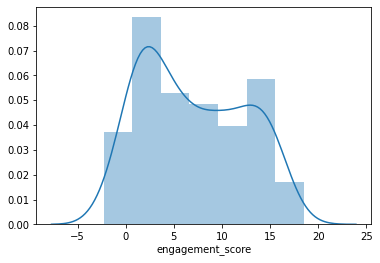

In [243]:
sns.distplot(df_chi['engagement_score'])
plt.show()

The distribution of `engagement_score` seems fine to move forward

Now we divide the dataset into 3 major levels of `engagement score`: `low`, `medium`, `high`. The medium contains `50%` of the dataset, each of the other 2 levels contains `25%` of the dataset

In [244]:
df_chi['engagement_label'] = 'Low'

In [245]:
df_chi

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,login_day,engagement_score,engagement_label
0,624205,80746,2019-10-30,False,True,True,True,False,0,24.0,3,1146,0,1564,30,14.344746,Low
1,624241,24520,2019-10-30,True,True,True,True,False,2,3.0,5,133,0,1766,30,5.219599,Low
2,111002,32047,2019-10-30,True,True,True,True,False,1,5.0,5,1571,0,2230,30,5.778040,Low
3,545113,23404,2019-10-30,True,True,True,False,False,1,10.0,21,0,0,633,30,16.789847,Low
4,750269,40235,2019-10-30,True,True,False,True,False,3,16.0,0,1405,0,1679,30,10.038961,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,944212,40572,2019-10-01,True,True,False,True,False,3,13.0,0,1174,0,2255,1,8.441558,Low
296,558332,87323,2019-10-01,True,False,False,True,False,2,0.0,0,97,0,1692,1,1.012987,Low
297,643880,51243,2019-10-01,True,False,False,True,False,2,0.0,0,906,0,1990,1,1.012987,Low
298,844518,23083,2019-10-01,True,False,False,True,False,1,0.0,0,139,0,1113,1,0.506494,Low


In [246]:
df_chi.loc[df_chi['engagement_score']> df_chi['engagement_score'].quantile(0.25),'engagement_label'] = 'Medium'

In [247]:
df_chi.loc[df_chi['engagement_score']> df_chi['engagement_score'].quantile(0.75),'engagement_label'] = 'High'

In [248]:
df_chi

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,login_day,engagement_score,engagement_label
0,624205,80746,2019-10-30,False,True,True,True,False,0,24.0,3,1146,0,1564,30,14.344746,High
1,624241,24520,2019-10-30,True,True,True,True,False,2,3.0,5,133,0,1766,30,5.219599,Medium
2,111002,32047,2019-10-30,True,True,True,True,False,1,5.0,5,1571,0,2230,30,5.778040,Medium
3,545113,23404,2019-10-30,True,True,True,False,False,1,10.0,21,0,0,633,30,16.789847,High
4,750269,40235,2019-10-30,True,True,False,True,False,3,16.0,0,1405,0,1679,30,10.038961,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,944212,40572,2019-10-01,True,True,False,True,False,3,13.0,0,1174,0,2255,1,8.441558,Medium
296,558332,87323,2019-10-01,True,False,False,True,False,2,0.0,0,97,0,1692,1,1.012987,Low
297,643880,51243,2019-10-01,True,False,False,True,False,2,0.0,0,906,0,1990,1,1.012987,Low
298,844518,23083,2019-10-01,True,False,False,True,False,1,0.0,0,139,0,1113,1,0.506494,Low


In [249]:
engagement_tab = pd.crosstab(index=df["engagement_label"], 
                           columns=df["inactive_status"], margins=True)

In [250]:
engagement_tab

inactive_status,False,True,All
engagement_label,,,
High,37,38,75
Low,30,45,75
Medium,61,88,149
All,128,171,299


The **`null hypothesis`** states that **the `level of engagement score` is independent from the `inactive_status`**, which mean knowing `level of engagement score` does not help you predict the level of `inactive_status`

In [257]:
from scipy.stats import chi2_contingency 
  
# defining the table 
data = [[37, 30, 61], [38, 45, 88]]
stat, p, dof, expected = chi2_contingency(data) 
  
# interpret p-value 
alpha = 0.5
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

p value is 0.4151208706440137
Dependent (reject H0)



With the confidence level `95%`, we can reject the `null hypothesis` and state that **`the level of engagement score` helps in predicting `inactive_status`**

**B. NUMERICAL TARGET**<a class="anchor" id="section2b"></a>

In this section, I want to handle the target columns `inactive_duration` based on these features: `session_projects_added`; `session_likes_given`, `session_comments_given`, `bugs_in_session`, `session_duration`and `login_day`. A simple Machine Learning model will be created to formula the `inactive_duration`

In [402]:
df_ml = (df.iloc[:,9:]).drop(columns=['inactive_duration','engagement_label'])

In [403]:
df_ml.head(5)

,session_projects_added,session_likes_given,session_comments_given,bugs_in_session,session_duration,login_day,engagement_score
0,0,24.0,3,0,1564,30,14.344746
1,2,3.0,5,0,1766,30,5.219599
2,1,5.0,5,0,2230,30,5.778040
3,1,10.0,21,0,633,30,16.789847
4,3,16.0,0,0,1679,30,10.038961


In [404]:
target_ml = df[['inactive_duration']]

Using `Standard Scaling` for the model

In [405]:
from sklearn.preprocessing import StandardScaler as Scaler

scaler = Scaler()

scaler.fit(df_ml)
df_scaled = scaler.transform(df_ml)

In [406]:
scaled_df = pd.DataFrame(df_scaled)
scaled_df.columns = df_ml.columns
df_learning = pd.concat([scaled_df, target_ml], axis=1)
df_learning.head(5)

,session_projects_added,session_likes_given,session_comments_given,bugs_in_session,session_duration,login_day,engagement_score,inactive_duration
0,-1.21293,1.431635,0.263401,-0.70464,0.544806,1.698334,1.389402,1146
1,0.28569,-0.788477,1.153310,-0.70464,0.839386,1.698334,-0.325396,133
2,-0.46362,-0.577038,1.153310,-0.70464,1.516045,1.698334,-0.220453,1571
3,-0.46362,-0.048440,8.272578,-0.70464,-0.812888,1.698334,1.848885,0
4,1.03500,0.585878,-1.071462,-0.70464,0.712512,1.698334,0.580259,1405


I only train and test on 2 popularly well-performed model: `Linear Regression` and `Support Vector Machine`

In [426]:
import sklearn.model_selection
#Import all the learning algorithms we want to test
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

In [427]:
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(df_learning.iloc[:,:7],df_learning.inactive_duration,test_size=0.25,random_state=5)

In [428]:
lr1=LinearRegression()
lr1.fit(X_train,Y_train)
pred_train=lr1.predict(X_train)
pred_test=lr1.predict(X_test) 

In [429]:
print(np.sqrt(np.mean(abs(Y_test-pred_test))))

26.24498514700046


In [430]:
svm1=SVC()
svm1.fit(X_train,Y_train)
pred_train_1 = svm1.predict(X_train)
pred_test_1 = svm1.predict(X_test)

In [431]:
print(np.sqrt(np.mean(abs(Y_test-pred_test_1))))

26.374988151656105


The `Linear Regression` model has better performance. Thus, I will construct a `report` on its details.

In [432]:
lr1.fit(scaler.transform(df_learning.iloc[:,:7]),df_learning.inactive_duration)

LinearRegression()

The `MAE_LR` **(Mean Absolute Error)** is constructed by formula: |`LR_prediction` - `inactive_duration`| / `Sample Size`(299)

In [442]:
df_learning['LR_prediction'] = lr1.predict((scaler.transform(df_learning.iloc[:,:7])))
df_learning['MAE_LR'] = (abs(df_learning['LR_prediction'] - df_learning['inactive_duration']))/299
lr_report = df_learning.iloc[:,7:]
lr_report

,inactive_duration,LR_prediction,MAE_LR
0,1146,698.010948,1.498291
1,133,879.325789,2.496073
2,1571,904.420592,2.229363
3,0,713.668348,2.386851
4,1405,778.101313,2.096651
...,...,...,...
294,1174,613.695221,1.873929
295,97,656.571492,1.871477
296,906,684.118031,0.742080
297,139,600.282120,1.542750


In [443]:
np.mean(lr_report['MAE_LR'])

2.427064158629262

The average `MAE`: `approx. 2.43`, which is acceptable!

In [444]:
#Intercept
print('intercept:', lr1.intercept_)

intercept: 76882.27340954501


In [445]:
#Coefficient
print('coef:', lr1.coef_)

coef: [ 1.44072618e+01 -1.71789083e+02  2.59383569e+01  1.86180702e+02
  4.34657071e+04  6.05555953e+02 -2.97515188e+02]


# 3.- Analysis Summary<a class="anchor" id="section3"></a>

**A. CATEGORICAL TARGET**<a class="anchor" id="section3a"></a>

The`inactive` status can be predicted by the conditional probability of whether the bug occur or no project/like/comment given by the session. Meanwhile, to conclude the `active` status, a feature is constructed by the formula: <br>`engagement score` = (<font color = 'red'>42.9</font> * `session_projects_added`+ <font color = 'red'>45.1</font> * `session_likes_given`+ <font color = 'red'>44.2</font> * `session_comments_given` - <font color = 'red'>47.5</font> * `bugs_in_session`)/(42.9+45.1+44.2-47.5)


Thus, the 2-way table becomes as below:

In [448]:
engagement_tab

inactive_status,False,True,All
engagement_label,,,
High,37,38,75
Low,30,45,75
Medium,61,88,149
All,128,171,299


At the confidence level of 95%, the level of `engagement_label` has significant effect on `inactive_status` by `Chi-squared testing`

In [449]:
df_learning

,session_projects_added,session_likes_given,session_comments_given,bugs_in_session,session_duration,login_day,engagement_score,inactive_duration,LR_prediction,MAE_LR
0,-1.21293,1.431635,0.263401,-0.70464,0.544806,1.698334,1.389402,1146,698.010948,1.498291
1,0.28569,-0.788477,1.153310,-0.70464,0.839386,1.698334,-0.325396,133,879.325789,2.496073
2,-0.46362,-0.577038,1.153310,-0.70464,1.516045,1.698334,-0.220453,1571,904.420592,2.229363
3,-0.46362,-0.048440,8.272578,-0.70464,-0.812888,1.698334,1.848885,0,713.668348,2.386851
4,1.03500,0.585878,-1.071462,-0.70464,0.712512,1.698334,0.580259,1405,778.101313,2.096651
...,...,...,...,...,...,...,...,...,...,...
294,1.03500,0.268719,-1.071462,-0.70464,1.552503,-1.693249,0.280075,1174,613.695221,1.873929
295,0.28569,-1.105636,-1.071462,-0.70464,0.731470,-1.693249,-1.115902,97,656.571492,1.871477
296,0.28569,-1.105636,-1.071462,-0.70464,1.166049,-1.693249,-1.115902,906,684.118031,0.742080
297,-0.46362,-1.105636,-1.071462,-0.70464,-0.112895,-1.693249,-1.211082,139,600.282120,1.542750


**B. NUMERICAL TARGET**<a class="anchor" id="section3b"></a>

With the average Absolute Error (MAE) `approx. 2.43`, `inactive_duration` can be predicted by formula:

**<font color = 'red'>inactive_duration</font> = 768.8e+02 + 14.4*`session_projects_added` -171.8*`session_likes_given` + 25.94*`session_comments_given`+ 186.2*`bugs_in_session` + 4.35e+04*`session_duration` - 6.1e+02*`login_day` -3e+02*`engagement_score`**